In [53]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib notebook 
plt.rcParams["figure.figsize"] = (3,3)
from scipy.integrate import odeint
from scipy.optimize import fsolve


Les équations de Lotka-Volterra, ou "modèle proie-prédateur", sont couramment utilisées pour décrire la dynamique de systèmes biologiques dans lesquels un prédateur et sa proie interagissent dans un milieu commun.  Elles ont été proposées indépendamment par A. J. Lotka en 1925 et V. Volterra en 1926 et s'écrivent de la manière suivante :
\begin{align*}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1)
\end{align*}
où $x_1$ et $x_2$ désignent le nombre (positif) de proies et de prédateurs respectivement et $\alpha$, $\beta$, $\gamma$, $\delta$ sont des paramètres strictement positifs.

In [54]:
alpha = 2/3; beta = 4/3; gamma = 1; delta = 1;
param = np.array([alpha,beta,gamma,delta])

def f_LV(x,param_LV):
    x1, x2 = x
    alpha, beta, gamma, delta = param_LV
    return np.array([x1*(alpha-beta*x2), -x2*(gamma-delta*x1)])

def Jf_LV(x,param_LV):
    # A COMPLETER...


[[-0.66666667 -1.33333333]
 [ 1.         -0.        ]]


Etudes préliminaires
===================

Propriétés théoriques 
-----

Soit $f: \mathbb{R}^2 \to \mathbb{R}^2$ définie par
$$
f(x) = 
\left(
\begin{matrix}
x_1(\alpha -\beta x_2)  \\
-x_2(\gamma-\delta x_1)
\end{matrix}
\right)
$$
L'équation différentielle qui nous intéresse est donc $\dot{x}=f(x)$. On peut montrer de manière théorique que les solutions $t\mapsto x(t)$ initialisées dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$ sont uniques, définies pour tout $t\geq 0$ et restent dans $\mathbb{R}_{>0}\times\mathbb{R}_{>0}$.

**Question** Déterminer les points d'équilibre du système, cad les $x\in \mathbb{R}^2$ tels que $f(x) = 0$. 

On considère la fonction $H: \mathbb{R}_{>0}\times \mathbb{R}_{>0} \to \mathbb{R}$
$$
H(x_1,x_2) = \delta x_1 - \gamma \ln x_1 + \beta x_2 - \alpha \ln x_2  
$$

**Question** Montrer que $t\mapsto H(x(t))$ est constant le long des trajectoires. 

Identification de modèle
----------------------------

On génère ci-dessous des données bruitées d'une trajectoire $(x_1,x_2)$ correspondant à une conditions initiale générée aléatoirement : array ``x1_data`` et ``x2_data`` de taille Ndata, où Ndata est le nombre de points de la trajectoire.

**Question** Proposer un algorithme permettant d'estimer les paramètres $\alpha,\beta,\gamma,\delta$ à partir de ces données par régression linéaire. On pourra par exemple estimer numériquement les dérivées $\dot{x}_1,\dot{x}_2$, ou leurs intégrales sur des intervalles à choisir. Evaluer ses performances en fonction des paramètres des données (pas de temps, bruit de mesure etc).
Pourrait-on aussi utiliser l'information que $H$ est constante le long des trajectoires ? Quel en serait l'avantage ? 


<IPython.core.display.Javascript object>


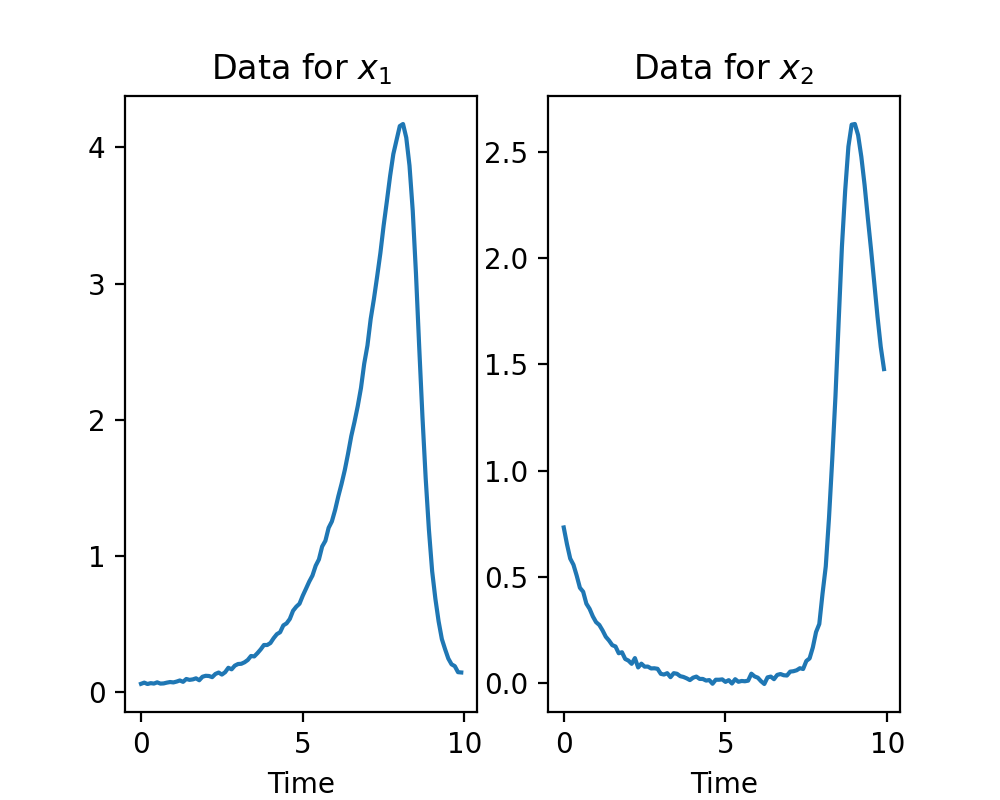

In [55]:
CI = np.random.rand(2)  # génération de conditions initiales aléatoires
dt = 0.1  # pas de temps des données
tf_data = 10 # horizon de temps des données
var_noise = 0.01 # variance du bruit

# génération des données
t_eval=np.arange(0,tf_data,dt)
Ndata = np.size(t_eval)
x1_data = np.zeros((Ndata,))
x2_data = np.zeros((Ndata,))
sol = odeint(lambda _x,_t : f_LV(_x,param),CI,t_eval).T
x1_data[:] = sol[0] + np.random.normal(0, var_noise, Ndata)
x2_data[:] = sol[1] + np.random.normal(0, var_noise, Ndata)

fig, ax = plt.subplots(1, 2,figsize=(5, 4))
ax[0].plot(t_eval,x1_data.T);
ax[0].set_title('Data for $x_1$');
ax[0].set_xlabel('Time');
ax[1].plot(t_eval,x2_data.T);
ax[1].set_title('Data for $x_2$');
ax[1].set_xlabel('Time');



In [6]:
# Méthode de reconstruction des paramètres
# A COMPLETER
param_est = ...

In [7]:
# comparaison d'une trajectoire réelle et estimée
sol = odeint(lambda _x,_t : f_LV(_x,param),CI,t_eval).T
traj_reel = sol
sol = odeint(lambda _x,_t : f_LV(_x,param_est),CI,t_eval).T
traj_est = sol

plt.figure(figsize=(5, 4))
plt.plot(x1_data[:],x2_data[:],label = "Données")
plt.plot(traj_reel[0],traj_reel[1],label = "Paramètres réels")
plt.plot(traj_est[0],traj_est[1], label = "Paramètres estimés")
plt.legend()
plt.grid()
plt.xlabel('$x_1$')
plt.ylabel('$x_2$');

NameError: name 'odeint' is not defined


**Question** Retrouver numériquement les points d'équilibre calculés précédemment en implémentant une méthode de Newton-Raphson. On pourra comparer l'effet de la condition initiale donnée à l'algorithme, ainsi que les performances numériques par rapport à la méthode fsolve de scipy.minimize. 

In [58]:
def find_equilibrium_newton(f,Jf,x0,tol,Niter):
    xk = np.copy(x0) 
    iter = 0
    while(iter < Niter) and np.linalg.norm(f(xk))>tol:
        # A COMPLETER...
    return xk,iter,f(xk)

In [13]:
# A COMPLETER...
x0 = ...
x,iter,fk = find_equilibrium_newton(lambda _x: f_LV(_x,param),lambda _x: Jf_LV(_x,param),x0,1e-6,100)

NameError: name 'find_equilibrium_newton' is not defined

Simulation des trajectoires 
=======================

Algorithmes d'Euler 
------------

**Question** Coder des fonctions prenant en entrée une fonction $F:\mathbb{R} \times \mathbb{R}^n \to \mathbb{R}^n$ quelconque, les temps initiaux et finaux, une condition initiale $x_0$, un pas de temps $dt$, et renvoyant le vecteur des temps $t^j$ et de la solution $x^j$ des schémas d'Euler explicite et implicite respectivement appliqués à $\dot{x}=F(t,x)$.

In [60]:
def solve_euler_explicit(F, t0, x0, dt, t_f):

    # A COMPLETER...
        
    return (np.array(ts), np.array(xs).T)

In [61]:
def solve_euler_implicit(F, t0, x0, dt, t_f, itermax = 100):
    
    # A COMPLETER...
        
    return (np.array(ts), np.array(xs).T)

**Question** Tester vos algorithmes sur le système de Lotka-Volterra. Les solutions numériques vous semblent-elles réalistes ? Sur quel horizon de temps ? 

In [8]:
# A COMPLETER...

Solver scipy
-----------------------

**Question** Utiliser maintenant la fonction `odeint` de scipy.integrate. Est-ce que le problème vous paraît résolu ? 

On peut jouer avec les tolérances (ou le pas de temps maximal). On voit alors que même si $H$ parait se conserver pour un $t_f$ et une tolérance donnés, cela n'est pas le cas lorsqu'on augmente $t_f$ ou on diminue les tolérances. Ceci dit, les tolérances permettent de choisir efficacement le pas de temps pour garantir un seuil d'erreur sur un horizon de temps $t_f$ donné.

In [9]:
# A COMPLETER... (On pourra se reporter en question 3, qui donne la syntaxe de la fonction odeint)


Euler modifié
---------------------

On propose maintenant de modifier les schémas d'Euler explicite/implicite "à la main" de façon à stabiliser $H$ et assurer sa conservation le long des solutions numériques, peu importe l'horizon de simulation.

En fait, grâce à l'unicité des solutions pour des dynamiques continûment différentiables (théorème de Cauchy-Lipschitz), on peut montrer que les solutions de
 \begin{align*}
 \dot{x}_1 &= x_1(\alpha -\beta x_2) - u_1(x_1,x_2) (H(x_1,x_2)-H_0) \\
 \dot{x}_2 &= -x_2(\gamma - \delta x_1) - u_2(x_1,x_2) (H(x_1,x_2)-H_0) 
 \end{align*}
sont identiques à celles de Lotka-Volterra si $H_0 = H(x(0))$ pour tout choix de $u:\mathbb{R}_{>0}\times \mathbb{R}_{>0} \to \mathbb{R}_{>0}^2$ continûment différentiable.

Or, pour $H_0\in \mathbb{R}$ donné, on voit que si l'on choisit $u(x) = \nabla H(x)$, alors la dérivée de $H-H_0$ le long des solutions est
 $$
 \frac{d }{dt} (H(x(t))-H_0) = -k \| \nabla H(x(t)) \|^2 (H(x(t))-H_0) \ ,
 $$ 
et donc que $H(x(t))$ converge exponentiellement vers $H_0$ lorsque $t$ tend vers l'infini s'il existe $\delta>0$ tel que $\| \nabla H(x(t)) \|>\delta$ ou de manière équivalent $\|x-\bar{x}\|>\delta>0$ pour tout $t$. 

**Question** En déduire comment modifier l'implémentation du schéma d'Euler pour assurer la stabilité de $H$. Quel est le rôle de $k$ ? Peut-il être choisi arbitrairement grand ? Pourquoi ? On pourra exprimer $H(x^{j+1})-H(x_0)$ en fonction de $H(x^{j})-H(x_0)$ au premier ordre en $dt$.

In [12]:
def solve_euler_explicit_mod(F, t0, x0, dt, t_f):
    # A COMPLETER...
    return (np.array(ts), np.array(xs).T)

# A COMPLETER...

Contrôle
=========

On considère maintenant le système dynamique
\begin{align*}
\dot{x}_1 &= x_1(\alpha -\beta x_2) \\
\dot{x}_2 &= -x_2(\gamma - \delta x_1) + u(t)
\end{align*}
où $u$ est une variable traduisant le fait que l'on introduit où élimine des prédateurs. On cherche à stabiliser la population de proie à une valeur $x_1^r$. Une loi de contrôle réalisant cela est
\begin{align*}
    u(t) &= x_2(\gamma - \delta x_1) - \lambda_2(x_2-v) + \dot v \\
    v(t) &= \frac{\lambda_1}{x_1}(x_1-x_1^r) + \frac{\alpha}{\beta}
\end{align*}
où
\begin{align*}
   \dot v(t) &= \frac{\lambda_1}{x_1}(x_1-x_1^r)(\alpha -\beta x_2) -\lambda_1(\alpha -\beta x_2)
\end{align*}
**Question** Implémenter cette loi de contrôle dans votre simulation précédente.



In [11]:
# A COMPLETER...